# Task 1

creation of a few constants and arrays

In [1]:
import numpy as np
import matplotlib.pyplot as plt

starttime = 0;
endtime = 1;
R = 90*10**(6); #membrane resistance
E_l = -65*10**(-3); #membrane resting potential
tau_m = 30*10**(-3); #time constant
u_th = -50*10**(-3); #threshold potential 
refrac = 0 #5*10**(-3); #resting time inbetween spikes
u_reset = E_l; #reset potential after a spike

I1 = np.ones(10000)*10**(-12)
t = np.arange(starttime,endtime*10000)
spike = np.zeros(10000)
dt = (t[2]-t[1])/10000
for i in range(0,1000):
    I1[i] = 0
for i in range(9000,10000):
    I1[i] = 0
u = np.ones(10000)*E_l;



# a)

In [2]:
I1 = np.ones(10000)*500*10**(-12)
t = np.arange(0,1*10000)
spike = np.zeros(10000)

#making the constant current for the time intervall 0.1 to 0.9
for i in range(0,1000):
    I1[i] = 0
for i in range(9000,10000):
    I1[i] = 0
u = np.ones(10000)*E_l;

#making a sum for all the spikes during 1 second of elapsed time
for i in range(1,10000):
    dudt = (E_l - u[i] + R*I1[i])/tau_m
    u[i] = u[i-1] + dudt*dt
    if u[i] > u_th:
        u[i] = u_reset
        spike[i] = 1
sumSpike = sum(spike)/0.8

print(sumSpike)

98.75


As seen above if the input current is 500pA the spiking rate is equal to 98.75Hz.
Both of which compared to the lecture slides seems reasonable

# b)

In [3]:
I2 = np.ones(10000)*25*10**(-12) # since j in range(0,1200) would take ages i decided to use 
# 1200/25 = 48 different values for the inputcurrent (laptop)

spike = np.zeros(10000) 
dt = (t[2]-t[1])/10000

#making the constant current for the time intervall 0.1 to 0.9
for i in range(0,1000):
    I2[i] = 0
for i in range(9000,10000):
    I2[i] = 0

#resetting values for the previous cell
u = np.ones(10000)*E_l;
end = 48
sumSpike = np.zeros(end)
Icurrent = np.ones(end)


for j in range(0,end):
    for i in range(1,10000):
        dudt = (E_l - u[i] + R*I2[i]*j)/tau_m
        u[i] = u[i-1] + dudt*dt
        if u[i] > u_th:
            u[i] = u_reset
            spike[i] = 1
    sumSpike[j] = sum(spike)/0.8   
    Icurrent[j] = I2[5000]*j
    #resetting values for the next loop
    u = np.ones(10000)*E_l;
    spike = np.zeros(10000) 

In [4]:
#zeroing values outside of the [10 200]Hz intervall
end = 48 
for k in range(0,end):
    if sumSpike[k] < 10:
        sumSpike[k] = 0
    if sumSpike[k] > 200:
        sumSpike[k] = 0
print(sumSpike)

[  0.     0.    10.    13.75  20.    25.    28.75  33.75  38.75  43.75
  48.75  53.75  58.75  63.75  68.75  73.75  80.    83.75  88.75  93.75
  98.75 103.75 108.75 113.75 118.75 122.5  128.75 132.5  138.75 143.75
 148.75 153.75 157.5  163.75 168.75 171.25 177.5  181.25 187.5  191.25
 200.     0.     0.     0.     0.     0.     0.     0.  ]


Text(0, 0.5, 'Spiking rate [10 200]Hz')

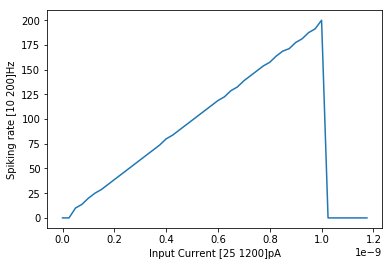

In [5]:
plt.plot(Icurrent,sumSpike)
plt.xlabel('Input Current [25 1200]pA')
plt.ylabel('Spiking rate [10 200]Hz')


In [6]:
%%latex 
No they are ot similar since the Fig. 2.11 in [2] got a refractory period $\neq$ 0, which is what we got here

<IPython.core.display.Latex object>

# c) 

In [7]:
%%latex 
$\large T = tau_m * ln\frac{R*I_0}{R*I_0-\delta_{th}} , \quad I_0 = 600pA , \delta_{th} = abs(E_l - v_{th})$


<IPython.core.display.Latex object>

In [8]:
T = tau_m * np.log((R*I2[5000]*24)/(R*I2[5000]*24-(u_th-E_l)))                
print('T = ',T)
print('T^(-1) = Hz_T =', 1/T)

T =  0.009762672013038837
T^(-1) = Hz_T = 102.43097367856046


In [9]:
%%latex 
The derived value of $Hz_T$ with the constant input current of 600pA is $ = 102 Hz$.
Which seems like a resonable value if you compare it to the graph above 


<IPython.core.display.Latex object>

In [10]:
%%latex
$\nu = \frac{1}{\Delta + T} = \frac{1}{\Delta^{abs} + tau_m * ln\frac{R*I_0}{R*I_0-\delta_{th}}} = \frac{1}{T_{\Delta}}$

<IPython.core.display.Latex object>

In [11]:
%%latex
Here we add a refractory period, a period that in the biological sense describes the "recovery" 
period for a neuron spike, to simulate an more accurate model for a spiking neuron.
Which explains the eq. 4.9 [2]

<IPython.core.display.Latex object>

# d)


In [12]:
I3 = np.ones(10000)*6*10**(-12) # since j in range(0,1200) would take ages i decided to use 
# 1200/6 = 200 different values for the inputcurrent (laptop)

refrac = 5*10**(-3)*10000 #resting time inbetween spikes
spike = np.zeros(10000) 
dt = (t[2]-t[1])/10000

#making the constant current for the time intervall 0.1 to 0.9
for i in range(0,1000):
    I3[i] = 0
for i in range(9000,10000):
    I3[i] = 0

#resetting values for the previous cell
u = np.ones(10000)*E_l;
end = 200
sumSpike1 = np.zeros(end)
Icurrent1 = np.ones(end)
z = 0


for j in range(0,end):
    for i in range(1,10000):
        if z == 0:
            dudt = (E_l - u[i] + R*I3[i]*j)/tau_m
            u[i] = u[i-1] + dudt*dt
            if u[i] > u_th:
                u[i] = u_reset
                spike[i] = 1
                z = refrac # if the threshold for the spike is triggerd there is a recovery period for the "neuron", here that
                # preiod is refrac = 50ms
        elif z > 0:
            z = z - 1
    sumSpike1[j] = sum(spike)/0.8
    Icurrent1[j] = I3[5000]*j
    #resetting values for the next loop
    u = np.ones(10000)*E_l;
    I = np.ones(10000)*6*10**(-12)
    for i in range(0,1000):
        I3[i] = 0
    for i in range(9000,10000):
        I3[i] = 0
    spike = np.zeros(10000)

In [13]:
#zeroing values outside of the [10 200]Hz intervall
for k in range(0,end):
    if sumSpike1[k] < 10:
        sumSpike1[k] = 0
    if sumSpike1[k] > 200:
        sumSpike1[k] = 0

Text(0, 0.5, 'Spiking rate [10 200]Hz')

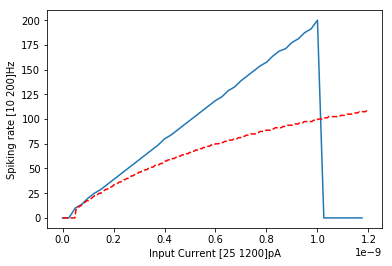

In [14]:
plt.plot(Icurrent,sumSpike)
plt.plot(Icurrent1,sumSpike1,'--r')
plt.xlabel('Input Current [25 1200]pA')
plt.ylabel('Spiking rate [10 200]Hz')


In [15]:
%%latex
Here we again have the frequency
$\nu = \frac{1}{\Delta + T} = \frac{1}{\Delta^{abs} + tau_m * ln\frac{R*I_0}{R*I_0-\delta_{th}}} = \frac{1}{T_{\Delta}}\quad $
where $\Delta^{abs}$ = 5ms, $\delta_{th} = abs(E_l - v_{th})$ then we calculate $\nu$ to;

<IPython.core.display.Latex object>

In [16]:
T_D = 5*10**(-3) + tau_m * np.log((R*I3[5000]*100)/(R*I3[5000]*100-(u_th-E_l)))
print('v = 1/T_D =',1/T_D, 'Hz')

v = 1/T_D = 67.73841477455909 Hz


In [17]:
%%latex
If we compare the red-dotted line on the polt for the value $I_0 = 600 pA$ 
we observe that $\nu$ and the plot is reasonably close

<IPython.core.display.Latex object>

# e)

The refractory period in a neuron is the biologically bi-effect of a spike. During the spike the neuron cell creates a imbalance of the potassium and sodium levels within and outside the cellmembrane. The refractory period is the rebalancing of these, and a few more, elements. 

# f)

Three of many limitations that is mentioned in the Neural dymaics is that the leaky integrate-and-fire model
"simplified", "neglects many aspects of neuro dynamics" and for this task specificly the current is "integrated linearly independently of the state of the postsynaptic neuron". 

# Task 2

# a)

In [18]:
count = 500
thy = np.zeros(count)
recliny = np.zeros(count)
sigmoidy = np.zeros(count)
tanhy = np.zeros(count)

#defining the functions
def th (x):
    if x < 0:
        th1 = 0 
    else:
        th1 = 1
    return th1;
def reclin (x):
    if x < 0:
        reclin1 = 0 
    else:
        reclin1 = x
    return reclin1;
def sigmoid (x):
    sigmoid1 = 1/(1 + np.exp(-1*x))
    return sigmoid1;
def tanh (x):
    tanh1 = (2/(1 + np.exp(-2*x))) - 1
    return tanh1;

x = np.linspace(-2,2,count)
func = [th, reclin, sigmoid, tanh]
y = [thy, recliny, sigmoidy, tanhy]

#calculationg the function values for the input arguments in x
for j in range(0,4):       
    for i in range(0,count):
        y[j][i] = func[j](x[i])

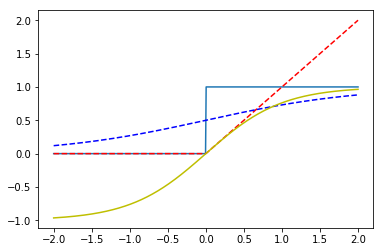

In [19]:

#plotting the functions
plt.plot(x,y[0])
plt.plot(x,y[1],'--r')
plt.plot(x,y[2],'--b')
plt.plot(x,y[3],'y')

# b)

# c)


In [20]:
%%latex
The quantities $\textbf{x}$, $\textbf{w}$ and b is the input vector signal, the weight vector(for the input signal) and threshold bias respectively. 

The functions can be seen below in $\textbf{d)}$

<IPython.core.display.Latex object>

# d)

In [21]:
Xin = [[1,1],[1,0],[0,1],[0,0]]
Weights = [[-1,-1],[1,-1],[-1,1],[-1,-1]]
Y = np.zeros(4)
b = 0.5
def perceptron (X , W , b):
    percep = np.dot(X , W)
    percep = activation(percep + b)
    return percep;
def activation (x):
    if x > 0:
        y = 1
    else:
        y = 0
    return y; 
for i in range(0,4):
    Y[i] = perceptron(Xin[i],Weights[i],b)

print(Y)

[0. 1. 1. 1.]


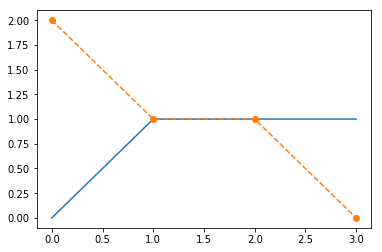

In [22]:
t = np.zeros(4)
plt.plot(Y)
for i in range(0,4):
    t[i] = Xin[i][0] + Xin[i][1] 
plt.plot(t,'--o')


# e)

In [23]:
Xin2 = [[1,1],[1,0],[0,1],[0,0]]
Weights2 = [[-1,-1],[1,-1],[-1,1],[-1,-1]]
Y2 = np.zeros(4)
b2 = -0.5 

def activation (x):
    if x > 0:
        y = 1
    else:
        y = 0
    return y;

def perceptron (X , W , b):
    percep = np.dot(X , W)
    percep = activation(percep + b)
    return percep; 

for i in range(0,4):
    Y2[i] = perceptron(Xin2[i],Weights2[i],b2)
    
print(Y2)

[0. 1. 1. 0.]


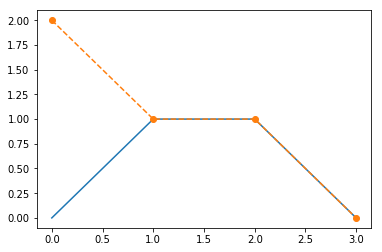

In [24]:
t = np.zeros(4)
plt.plot(Y2)
for i in range(0,4):
    t[i] = Xin2[i][0] +Xin2[i][1] 
plt.plot(t,'--o')

In [25]:
%%latex 
Yes since theres not a specific value for the weights we can put $\textbf{w}_1 = 1$ and $\textbf{w}_2 = 1$,  which makes
the input signals have equal impact for the output signal.
As the plot above shows the when both input signals, $\textbf{x}_1$ and $\textbf{x}_2$, is active there is not output signal and when only one of the input signals is active then there is a output signal.

<IPython.core.display.Latex object>

# f)

From the logical standpoint the current flowing into the neuron cell through the synapses can approximately be described as a sum of N, where N is large, discrete currents that can either be on or off. The bias can be described, like in the lectrue notes, as the threshold. The weights in this case is all equal since the input signals are either on or off and each inputsignal has the same impact on the output signals and the other. If the current, the amount of active input signals, is sufficient enought the threshold will be reached and a signal, the output signal, will be forwarded or in the biological sense a spike will be emitted.

# Task 3

In [26]:
NUMin2 = [[1,1,1,1,1,1,0],
         [0,1,1,0,0,0,0],
         [1,1,0,1,1,0,1],
         [1,1,1,1,0,0,1],
         [0,1,1,0,0,1,1],
         [1,0,1,1,0,1,1],
         [1,0,1,1,1,1,1],
         [1,1,1,0,0,0,0],
         [1,1,1,1,1,1,1],
         [1,1,1,0,0,1,1]]
#here we defined all the 10 numbers as 10 different vectors according to the Task manual, where the vector NUMin[0]
# would correspond to the number 0 in a seven-segment display and the same goes for 1,2,..,9.
w2 = [[1.5,1.5,1.5,1.5,1.5,1.5,-6],
     [-2,5,5,-2,-2,-2,-2],
     [2,2,-5,2,2,-5,2],
     [2,2,2,2,-5,-5,2],
     [-4,3,3,-4,-4,3,3],
     [2,-5,2,2,-5,2,2],
     [1.5,-6,1.5,1.5,1.5,1.5,1.5],
     [4,4,4,-3,-3,-3,-3],
     [1,1,1,1.2,1.5,1.5,1.5],
     [2,2,2,-5,-5,2,2]]

NUMmatrix = np.zeros((10,10))
NUMmatrix2 = np.zeros((10,10))

b2 = 8 # the threshold for each perceptron are choosen so that the activation of each percepron
# only happends for one specific number.

Y4 = np.zeros((10,10))

def perceptron0 (X , W , b):
    percep = np.dot(X , W)
    NUMmatrix[i][j] = percep
    NUMmatrix2[i][j] = percep/(np.linalg.norm(X)*np.linalg.norm(W))
    percep = activation(percep - b)
    return percep;
def perceptron1 (X , W , b):
    percep = np.dot(X , W)
    NUMmatrix[i][j] = percep
    NUMmatrix2[i][j] = percep/(np.linalg.norm(X)*np.linalg.norm(W))
    percep = activation(percep - b)
    return percep;
def perceptron2 (X , W , b):
    percep = np.dot(X , W)
    NUMmatrix[i][j] = percep
    NUMmatrix2[i][j] = percep/(np.linalg.norm(X)*np.linalg.norm(W))
    percep = activation(percep - b)
    return percep;
def perceptron3 (X , W , b):
    percep = np.dot(X , W)
    NUMmatrix[i][j] = percep
    NUMmatrix2[i][j] = percep/(np.linalg.norm(X)*np.linalg.norm(W))
    percep = activation(percep - b)
    return percep;
def perceptron4 (X , W , b):
    percep = np.dot(X , W)
    NUMmatrix[i][j] = percep
    NUMmatrix2[i][j] = percep/(np.linalg.norm(X)*np.linalg.norm(W))
    percep = activation(percep - b)
    return percep;
def perceptron5 (X , W , b):
    percep = np.dot(X , W)
    NUMmatrix[i][j] = percep
    NUMmatrix2[i][j] = percep/(np.linalg.norm(X)*np.linalg.norm(W))
    percep = activation(percep - b)
    return percep;
def perceptron6 (X , W , b):
    percep = np.dot(X , W)
    NUMmatrix[i][j] = percep
    NUMmatrix2[i][j] = percep/(np.linalg.norm(X)*np.linalg.norm(W))
    percep = activation(percep - b)
    return percep;
def perceptron7 (X , W , b):
    percep = np.dot(X , W)
    NUMmatrix[i][j] = percep
    NUMmatrix2[i][j] = percep/(np.linalg.norm(X)*np.linalg.norm(W))
    percep = activation(percep - b)
    return percep;
def perceptron8 (X , W , b):
    percep = np.dot(X , W)
    NUMmatrix[i][j] = percep
    NUMmatrix2[i][j] = percep/(np.linalg.norm(X)*np.linalg.norm(W))
    percep = activation(percep - b)
    return percep;
def perceptron9 (X , W , b):
    percep = np.dot(X , W)
    NUMmatrix[i][j] = percep
    NUMmatrix2[i][j] = percep/(np.linalg.norm(X)*np.linalg.norm(W))
    percep = activation(percep - b)
    return percep;
def activation (x):
    if x > 0:
        y = 1
    else:
        y = 0
    return y;
func2 = [perceptron0,perceptron1,perceptron2,perceptron3,perceptron4,
    perceptron5,perceptron6,perceptron7,perceptron8,perceptron9]
for i in range(0,10):
    for j in range(0,10):
        Y4[i][j] = func2[j](NUMin2[j],w2[i],b2)
        
print(Y4)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


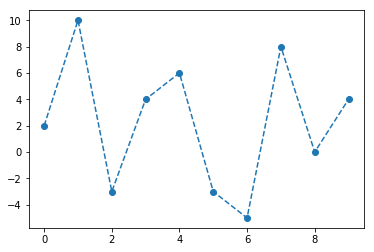

In [27]:
plt.plot(NUMmatrix[1],'--o') #unnormalized 

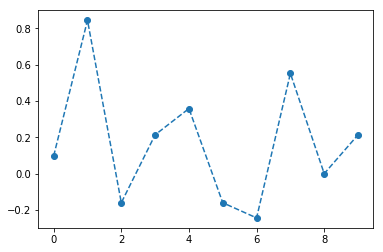

In [30]:
plt.plot(NUMmatrix2[1],'--o') #normalized

In [29]:
'''
optimise0 = np.zeros(10)
optimise1 = np.zeros(10)

sum0 = 0
sum1 = 0

for j in range(0,10):
    sum0 = 0
    sum1 = 0
    
    for i in range(0,10):
        #sum0 = sum0 + (NUMmatrix[j][j]-NUMmatrix[j][i])**2
        #sum1 = sum1 + (NUMmatrix[j][j]-(NUMmatrix2[j][i]*(NUMmatrix[j][j]/NUMmatrix2[j][j])))**2
        #sum0 = sum0 + np.sqrt((NUMmatrix[j][j]-NUMmatrix[j][i])**2)
        #sum1 = sum1 + np.sqrt((NUMmatrix[j][j]-(NUMmatrix2[j][i]*(NUMmatrix[j][j]/NUMmatrix2[j][j])))**2)
        sum0 = sum0 + (NUMmatrix[j][j]-NUMmatrix[j][i])
        sum1 = sum1 + (NUMmatrix[j][j]-(NUMmatrix2[j][i]*(NUMmatrix[j][j]/NUMmatrix2[j][j])))
        
        
    optimise0[j] = np.sqrt(sum0)
    optimise1[j] = np.sqrt(sum1)
    
plt.plot(optimise0 - optimise1)
'''

'\noptimise0 = np.zeros(10)\noptimise1 = np.zeros(10)\n\nsum0 = 0\nsum1 = 0\n\nfor j in range(0,10):\n    sum0 = 0\n    sum1 = 0\n    \n    for i in range(0,10):\n        #sum0 = sum0 + (NUMmatrix[j][j]-NUMmatrix[j][i])**2\n        #sum1 = sum1 + (NUMmatrix[j][j]-(NUMmatrix2[j][i]*(NUMmatrix[j][j]/NUMmatrix2[j][j])))**2\n        #sum0 = sum0 + np.sqrt((NUMmatrix[j][j]-NUMmatrix[j][i])**2)\n        #sum1 = sum1 + np.sqrt((NUMmatrix[j][j]-(NUMmatrix2[j][i]*(NUMmatrix[j][j]/NUMmatrix2[j][j])))**2)\n        sum0 = sum0 + (NUMmatrix[j][j]-NUMmatrix[j][i])\n        sum1 = sum1 + (NUMmatrix[j][j]-(NUMmatrix2[j][i]*(NUMmatrix[j][j]/NUMmatrix2[j][j])))\n        \n        \n    optimise0[j] = np.sqrt(sum0)\n    optimise1[j] = np.sqrt(sum1)\n    \nplt.plot(optimise0 - optimise1)\n'

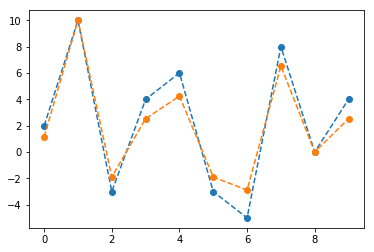

In [31]:
plt.plot(NUMmatrix[1],'--o') #unnormalized 
plt.plot(NUMmatrix2[1]*(NUMmatrix[1][1]/NUMmatrix2[1][1]),'--o') #normalized but scaled to the unnormalized value